In [ ]:
from IPython.display import clear_output 
import matplotlib.pyplot as plt
import serial
import numpy as np
import pandas as pd
from tqdm import tqdm
ser = serial.Serial(port='COM5', baudrate=115200)

In [35]:
ser.close()
ser.open()
num_meas = 100 # NB. default sample rate is 1 Hz 
estimated_pos = np.zeros([num_meas, 2], dtype=np.float64)
measured_pos = np.zeros([num_meas, 2], dtype=np.float64)

for i in tqdm(range(num_meas)):
    try:
        clear_output(wait=True) 
        parts = ser.readline().decode().split('|')

        measured_parts = parts[0].split('=')
        measured_pos[i, :] = np.float64(measured_parts[1].split(','))
        
        estimated_parts = parts[1].split('=')
        estimated_pos[i, :] = np.float64(estimated_parts[1].split(','))
    except KeyboardInterrupt:
        break
ser.close()

data = {
    'x_meas' : measured_pos[:, 0],
    'y_meas' : measured_pos[:, 1],
    'x_estimate' : estimated_pos[:, 0],
    'y_estimate' : estimated_pos[:, 1],
}
df = pd.DataFrame(data)
file_name = 'gnss_position_data.csv'
df.to_csv(file_name, index=False)
print(f"Data saved to {file_name}")

100%|██████████| 100/100 [01:45<00:00,  1.06s/it]

Data saved to gnss_position_data.csv


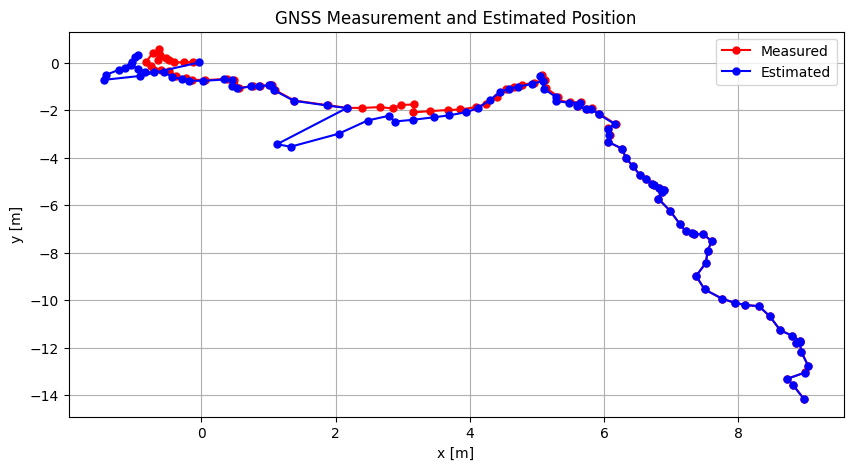

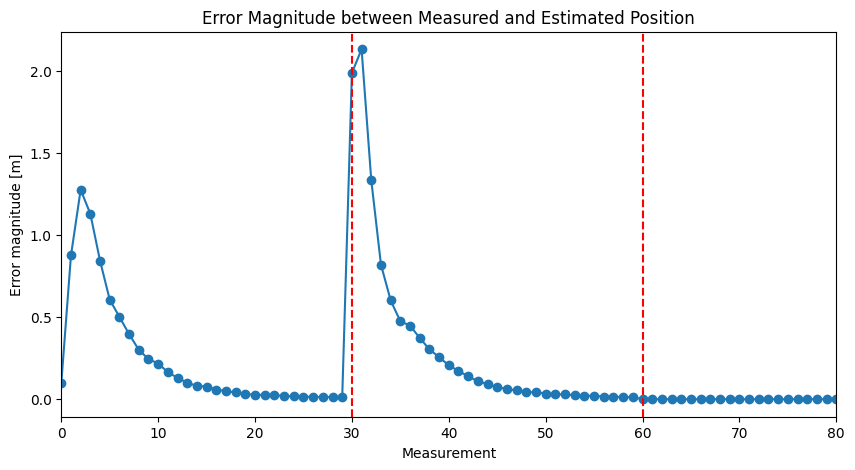

In [ ]:
import matplotlib.patches as patches
plt.figure(figsize=(10, 5))
plt.plot(measured_pos[:, 0], measured_pos[:, 1], '-ro', markersize=5, label='Measured')
plt.plot(estimated_pos[:, 0], estimated_pos[:, 1], '-bo', markersize=5, label='Estimated')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('GNSS Measurement and Estimated Position') 
plt.legend()
plt.grid()
plt.savefig('position_vs_measurement.png', dpi=300, bbox_inches='tight')

x_diff = estimated_pos[:, 0] - measured_pos[:, 0]
y_diff = estimated_pos[:, 1] - measured_pos[:, 1]
magnitude_diff = np.sqrt(x_diff**2 + y_diff**2) 

plt.figure(figsize=(10, 5))
plt.plot(magnitude_diff, '-o')
line_indices = np.arange(0, 60, 30)
for line in [30, 60]:
    plt.axvline(x=line, color='red', linestyle='--')
plt.xlim([0, 80])
plt.xlabel('Measurement')
plt.ylabel('Error magnitude [m]');
plt.title('Error Magnitude between Measured and Estimated Position') 
plt.savefig('magnitude_difference.png', dpi=300, bbox_inches='tight')